# Lyapunov v2.0

This notebook is for identifying where the lyapunov exponent changes sign to a high accuracy.

In [1]:
from modules.helper import *
import modules.lyapunov as lyp
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

tolerence = 1e-1

In [2]:
import modules.lyapunov as lyp
%autoreload
x = np.linspace(-10,10,10)
y = np.linspace(-10,10,10)
l = np.arange(0.5,1,0.01)
a = np.arange(0.5,1,0.01)

n_transient = 10000
n_attractor = 1000
x,y,l,a = np.meshgrid(x,y,l,a)


system = lyp.system(x,y,l,a,n_transient,n_attractor)

Iterating over the transient of 10000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Iterating over the attractor of 1000 steps
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
Generating initial conditions
Calculating the Jacobian Matrix for each point
System set up for analysis


In [3]:
system.calcLyapunov()

Calculating the Lyapunov Exponents
0% done iterating
10% done iterating
20% done iterating
30% done iterating
40% done iterating
50% done iterating
60% done iterating
70% done iterating
80% done iterating
90% done iterating
This took 113.74 seconds to run


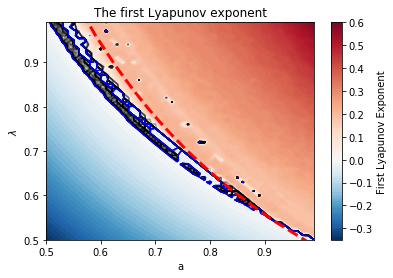

In [4]:
lyapunov_1 = system.plot_Lyapunov_1(figname = 'first_lyapunov')

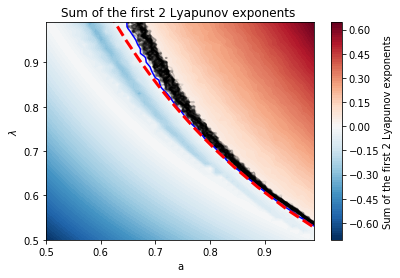

In [5]:
lyapunov_2 = system.plot_Lyapunov_2(figname = 'sum_of_first_two_lyapunov')

In [6]:
chaos = np.loadtxt('data/chaos_al.dat')

wild_chaos = np.loadtxt('data/wildchaos_al.dat')

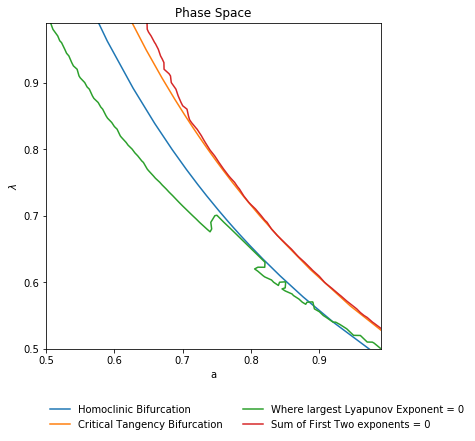

In [7]:
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(chaos[:,0],chaos[:,1], label='Homoclinic Bifurcation')
plt.plot(wild_chaos[:,0],wild_chaos[:,1],label = 'Critical Tangency Bifurcation')
plt.plot(lyapunov_1[:,0],lyapunov_1[:,1], label = 'Where largest Lyapunov Exponent = 0')
plt.plot(lyapunov_2[:,0],lyapunov_2[:,1], label = 'Sum of First Two exponents = 0')

ax.set_ylim([l.min(),l.max()])
ax.set_xlim([a.min(),a.max()])
plt.title('Phase Space')
plt.xlabel('a')
plt.ylabel('$\lambda$')
ax.legend(loc='center left', bbox_to_anchor= (0.00, -0.21), ncol=2, 
            borderaxespad=0, frameon=False)
plt.savefig('images/important_points.pdf', bbox_inches='tight')
plt.show()

In [8]:
import scipy.io

# scipy.io.savemat('data/first_lyapunov.mat', dict(a=lyapunov_1[:,0], l=lyapunov_1[:,1]))
# scipy.io.savemat('data/sum_of_first_two_lyapunov.mat', dict(a=lyapunov_2[:,0], l=lyapunov_2[:,1]))

# np.savetxt('data/first_lyapunov.dat', lyapunov_1, delimiter='   ')
# np.savetxt('data/sum_of_first_two_lyapunov.dat', lyapunov_2, delimiter='   ')

import pandas as pd
df_1 = pd.DataFrame(lyapunov_1)  
df_1.to_csv('data/first_lyapunov.dat', header=False, index = False)
df_2 = pd.DataFrame(lyapunov_2)  
df_2.to_csv('data/sum_of_first_two_lyapunov.dat', header=False, index = False)